# Gradient Descent

In this exercise, you will create the necessary functions to go through the steps of a single Gradient Descent Epoch. You will then combine the functions and create a loop through the entire Gradient Descent procedure.

## 1. Data Exploration

We'll import for you the following dataset of ingredients with their mineral content

In [1]:
import pandas as pd

data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_ingredients_zinc_phosphorous.csv")
data.head()

,aliment,zinc,phosphorus
0,Durum wheat pre-cooked. whole grain. cooked. u...,0.120907,0.193784
1,Asian noodles. plain. cooked. unsalted,0.047859,0.060329
2,Rice. brown. cooked. unsalted,0.156171,0.201097
3,Rice. cooked. unsalted,0.065491,0.045704
4,Rice. parboiled. cooked. unsalted,0.025189,0.045704


👇 We can visualize a somewhat Linear relationship between the `Phosphorus` and `Zinc`.   

Let's use Gradient Descent to find the line of best fit between them! 

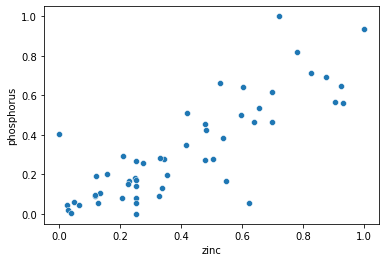

In [2]:
import seaborn as sns

sns.scatterplot(data=data, x='zinc', y='phosphorus');

👇 Create the two `np.Array`
- `data_X` for zinc
- `data_Y` for phosphorus

In [7]:
import numpy as np

data_X = np.array(data.zinc)
data_Y = np.array(data.phosphorus)

In [8]:
assert (data_X.shape == (53,))
assert (data_Y.shape == (53,))

## 2. Code one Epoch

In this section of the exercise, you will define the key functions used to update the parameters during one epoch $\color {red}{(k)}$ of gradient descent. Recall the formula below

$$
\beta_0^{\color {red}{(k+1)}} = \beta_0^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \beta_0}(\beta^{\color{red}{(k)}})
$$


$$
\beta_1^{\color {red}{(k+1)}} = \beta_1^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \beta_1}(\beta^{\color {red}{(k)}})
$$


### 2.1 Hypothesis Function

$$
\hat{y} =  a x + b
$$

👇 Define the hypothesis function of a Linear Regression. Let `a` be the slope and `b` the intercept.


In [9]:
def h(X,a,b):
    return a * X + b

### 2.2 Loss Function

$$
Sum\ Squares\ Loss = \sum_{i=0}^n (y^{(i)} - \hat{y}^{(i)} )^2
$$

👇 Define the SSR Loss Function for the above created Hypothesis Function. Reuse `h` coded above


In [14]:
import numpy as np

def loss(X,Y,a,b):
    return np.sum((Y - h(X,a,b)) ** 2)

❓ What would be the total Loss computed on all our ingredients dataset if:
- a = 1 
- b = 1

In [26]:
a = 1
b = 1
loss(data_X, data_Y, a, b)

63.868506986115456

⚠️ You should be getting 63.86. If not, something is wrong with your function. Fix it before moving on!

### 2.3 Gradient

$$
\frac{d\ SSR}{d\ slope}= \sum_{i=0}^n -2  x_i (y^{(i)} - \hat{y}^{(i)} )
$$

$$
\frac{d\ SSR}{d\ intercept}= \sum_{i=0}^n -2(y^{(i)} - \hat{y}^{(i)} ) 
$$

👇 Define a function to compute the partial derivatives of the Loss Function relative to parameter `a` and `b` at a given points.


<details>
<summary>💡 Hint</summary>
Again, you must use the Hypothesis Function within to compute the predictions at given points.
</details>

In [27]:
def gradient(X,Y,a,b):
    d_a = np.sum(-2 * data_X * (Y - h(X,a,b)))
    d_b = np.sum(-2 * (Y - h(X,a,b)))
    return d_a, d_b

❓ Using your function, what would be the partial derivatives of each parameter if:
- a = 1
- b = 1

In [28]:
d_a, d_b = gradient(data_X, data_Y, a, b)

⚠️ You should be getting 48.45 and  115.17. If not, fix your function!

### 2.4 Step Sizes

$$
step\ size = gradient \cdot learning\ rate
$$

👇 Define a function that calculates the step sizes alongside each parameter (`a`,`b`), according to their derivatives (`d_a`, `d_b`) and a learning_rate equals to 0.01 by default

In [29]:
def steps(d_a,d_b, learning_rate = 0.01):
    step_a = d_a * learning_rate
    step_b = d_b * learning_rate
    return (step_a, step_b)

❓ What would be the steps (`step_a`, `step_b`) to take for the derivatives computed above for (`a`,`b`) = (1,1)?

In [30]:
step_a, step_b = steps(d_a, d_b)

⚠️ The steps should be 0.48 for a and 1.15 for b

### 2.5 Update parameters (a, b)

$$
updated\ parameter = old\ parameter\ value - step\ size
$$

👇 Define a function that computes the updated parameter values from the old parameter values and the step sizes.

In [31]:
def update_params(a, b, step_a, step_b):
    a_new = a - step_a
    b_new = b - step_b
    return a_new , b_new

### 2.6 One full epoch

👇 Using the functions you just created, compute the updated parameters at the end of the first Epoch, had you started with parameters:
- a = 1
- b = 1

In [32]:
update_params(a, b , step_a, step_b)

(0.5154093419089099, -0.1517923733301405)

⚠️ You should be getting the following values:
   - updated_a = 0.51
   - updated_b = -0.15

## 3. Gradient Descent

👇 Now that you have the necessary functions for a Gradient Descent, loop through epochs until convergence.

- Initialize parameters `a = 1` and  `b = 1`
- Consider convergence to be **100 epochs**
- Don't forget to start each new epoch with the updated parameters
- Append the value of the loss, a, and b at each epoch to a list called `loss_history`, `a_history` and `b_history`

In [36]:
loss_history = []
a_history = []
b_history = []
a = 1
b = 1
for i in range(100):
    a_history.append(a)
    b_history.append(b)
    loss_history.append(loss(data_X, data_Y, a, b))
    d_a, d_b = gradient(data_X, data_Y, a, b)
    step_a, step_b = steps(d_a, d_b)
    a, b = update_params(a, b, step_a, step_b)

❓ What are the parameter values `a_100` and `b_100` at the end of the 100 epochs?

In [38]:
a_100 = a_history[99]
b_100 = b_history[99]

In [40]:
a_100

0.7686596499806505

In [39]:
# 🧪 Test your code
from nbresult import ChallengeResult
result = ChallengeResult('descent',
                         a_100=a_100,
                         b_100=b_100)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /home/useradd/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/useradd/code/LucaVanTichelen/data-challenges/05-ML/04-Under-the-hood/03-Batch-Gradient-Descent
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 2 items

tests/test_descent.py::TestDescent::test_a PASSED                        [ 50%]
tests/test_descent.py::TestDescent::test_b PASSED                        [100%]

============================== 2 passed in 0.22s ===============================


💯 You can commit your code:

git add tests/descent.pickle

git commit -m 'Completed descent step'

git push origin master


## 4. Visual check

👇 Wrap this iterative approach into a method `gradient_descent()` which returns your new a/b and `history`, a dictionary containing the 
- `loss_history`
- `a_history`
- `b_history`

In [0]:
def gradient_descent(X, Y, a_init=1, b_init=1, learning_rate=0.001, n_epochs=100):
    pass  # YOUR CODE HERE
    return a_new, b_new, history

👇 Plot the line of best fit through Zinc and Phosphorus using the parameters of your Gradient Descent.

In [0]:
# YOUR CODE HERE

## 5. Visualize your descent

Our goal is to plot our loss function and the descent steps on a 2D surface using matplotlib [contourf]

👇Start by creating the data we need for the plot
- `range_a` a range of 100 values for `a` equally spaced between -1 and 1
- `range_b` a range of 100 values for `b` equally spaced between -1 and 1 
- `Z` a 2D-array where each elements `Z[j,i]` is equal to the value of the loss function at `a` = `range_a[i]` and `b` = `range_b[j]`

In [0]:
# YOUR CODE HERE

In [0]:
# YOUR CODE HERE

👇 Now, plot in one single subplot:
- your gradient as a 2D-surface using matplotlib [contourf](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html)
- all historical (a,b) points as red dots to visualize your gradient descent!

Change your learning rate and observe it's impact on the graph!

In [0]:
# YOUR CODE HERE

👇 [optional] What about 3D? Try out this [plot.ly - 3D contour plot](https://plotly.com/python/3d-surface-plots/) below

In [0]:
import plotly.graph_objects as go

surface = go.Surface(x=range_a, y=range_b, z=Z)
scatter = go.Scatter3d(x=history['a'], y=history['b'], z=history['loss'], mode='markers')
fig = go.Figure(data=[surface, scatter])

#fig.update_layout(title='Loss Function', autosize=False, width=500, height=500)
fig.show()

👇 Plot the history of the `loss` values as a function of number of `epochs`. Vary the `learning_rate` from 0.001 to 0.01 and make sure to understand the difference

In [0]:
# YOUR CODE HERE

## 6. With Sklearn...

👇 Using Sklearn, train a Linear Regression model on the same data. Compare its parameters to the ones computed by your Gradient Descent.

In [0]:
# YOUR CODE HERE

They should be almost identical!

### 🏁 Congratulation! Please, push your exercise when you are done